In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

import sys
sys.path.append('/home/bis/2021_SJH_detectability/DbyDeep')
from RefModel.model_DeepMSpeptide import load_pep_and_codify

In [2]:
print('Loading model...')
model_2_1D = keras.models.load_model('/home/bis/2021_SJH_detectability/DbyDeep/RefModel/2019Bioinformatics_DeepMSPeptide/DeepMSPeptide/model_2_1D.h5')
# retrained

Loading model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
df_massive=pd.read_csv('/data/2021_SJH_detectability/data_human/train.csv')
df_hpp=pd.read_csv('/data/2021_SJH_detectability/data_human/HPP.csv')
df_merge=pd.DataFrame(np.concatenate([df_massive.peptide.unique(), df_hpp.peptide.unique()]), columns=['peptide'])
df_merge['Drop']=True

# Cross species : Mouse

Loading input peptides
Succesfully loaded 1250166 peptides and skipped 0
1250166/1250166 [==============================] - 290s 232us/sample - loss: 3.3018 - acc: 0.2736 - binary_crossentropy: 3.3018
Test Accuracy: [3.301827424965288, 0.2735541, 3.3018217]
Test AUC : 0.8552589261269842
              precision    recall  f1-score   support

       False     0.9930    0.7197    0.8345   1198253
        True     0.1200    0.8822    0.2112     51913

    accuracy                         0.7264   1250166
   macro avg     0.5565    0.8009    0.5229   1250166
weighted avg     0.9567    0.7264    0.8086   1250166



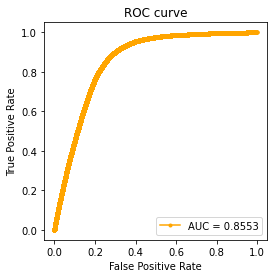

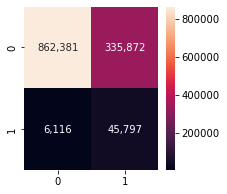

In [4]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/mouse_eph4/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_KLife_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_mouse_KLife_DeepMSpeptide_prob.npy', probs)
np.save('log/result_mouse_KLife_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 1134618 peptides and skipped 0
1134618/1134618 [==============================] - 271s 239us/sample - loss: 3.2766 - acc: 0.2803 - binary_crossentropy: 3.2766
Test Accuracy: [3.2765545609857165, 0.280267, 3.2765524]
Test AUC : 0.8264402203589566
              precision    recall  f1-score   support

       False     0.9897    0.7153    0.8304   1088363
        True     0.1096    0.8244    0.1934     46255

    accuracy                         0.7197   1134618
   macro avg     0.5496    0.7698    0.5119   1134618
weighted avg     0.9538    0.7197    0.8044   1134618



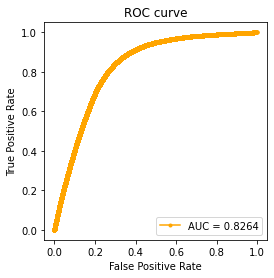

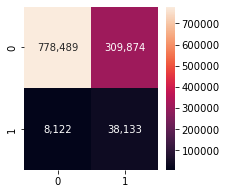

In [5]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/mouse_tmuscle/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_prob.npy', probs)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_true.npy', y_test)

# Cross species : Human

Loading input peptides
Succesfully loaded 1281061 peptides and skipped 0
Test AUC : 0.8279226888817048
              precision    recall  f1-score   support

       False     0.9897    0.7485    0.8524   1236318
        True     0.1015    0.7847    0.1797     44743

    accuracy                         0.7498   1281061
   macro avg     0.5456    0.7666    0.5160   1281061
weighted avg     0.9587    0.7498    0.8289   1281061



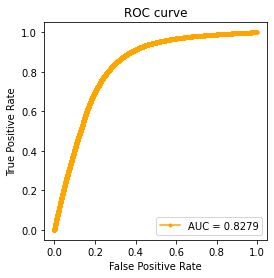

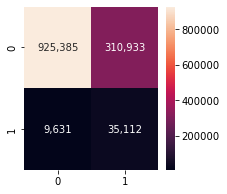

In [6]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/human_hek293/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HEK293_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_human_HEK293_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_human_HEK293_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_human_HEK293_DeepMSpeptide_prob.npy', probs)
np.save('log/result_human_HEK293_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 749788 peptides and skipped 0
Test AUC : 0.8429924389892769
              precision    recall  f1-score   support

       False     0.9946    0.7497    0.8550    733958
        True     0.0653    0.8111    0.1209     15830

    accuracy                         0.7510    749788
   macro avg     0.5300    0.7804    0.4879    749788
weighted avg     0.9750    0.7510    0.8395    749788



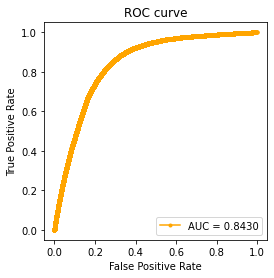

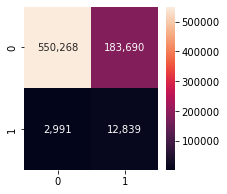

In [7]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/human_liver/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HmapLiver_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_human_HmapLiver_DeepMSpeptide_prob.npy', probs)
np.save('log/result_human_HmapLiver_DeepMSpeptide_true.npy', y_test)

# Yeast

Loading input peptides
Succesfully loaded 640574 peptides and skipped 0
640574/640574 [==============================] - 133s 207us/sample - loss: 3.0765 - acc: 0.2563 - binary_crossentropy: 3.0765
Test Accuracy: [3.076533749827488, 0.25629047, 3.076522]
Test AUC : 0.8527066316258957
              precision    recall  f1-score   support

       False     0.9735    0.7251    0.8312    557294
        True     0.3206    0.8680    0.4682     83280

    accuracy                         0.7437    640574
   macro avg     0.6471    0.7965    0.6497    640574
weighted avg     0.8886    0.7437    0.7840    640574



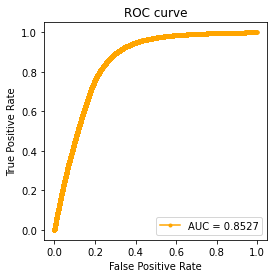

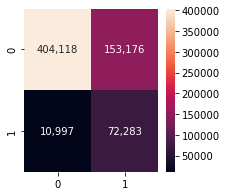

In [8]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/yeast_23/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_DelPBP1_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_prob.npy', probs)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_true.npy', y_test)

Loading input peptides
Succesfully loaded 588836 peptides and skipped 0
588836/588836 [==============================] - 122s 208us/sample - loss: 2.9544 - acc: 0.3215 - binary_crossentropy: 2.9544
Test Accuracy: [2.954350151397099, 0.32145452, 2.9543548]
Test AUC : 0.7802919698171726
              precision    recall  f1-score   support

       False     0.9803    0.6724    0.7977    554951
        True     0.1267    0.7787    0.2180     33885

    accuracy                         0.6785    588836
   macro avg     0.5535    0.7255    0.5079    588836
weighted avg     0.9312    0.6785    0.7643    588836



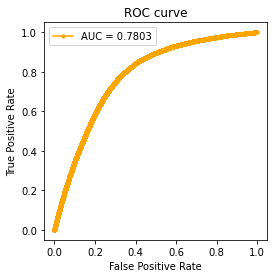

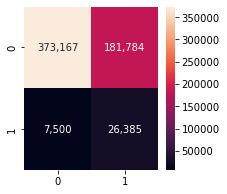

In [9]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/yeast_25/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_KLife_DeepMSpeptide_fpr.npy', fpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_tpr.npy', tpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_threshold.npy', threshold)
np.save('log/result_yeast_KLife_DeepMSpeptide_prob.npy', probs)
np.save('log/result_yeast_KLife_DeepMSpeptide_true.npy', y_test)